In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

In [78]:
s1 = []
s2 = []
s3 = []
s4 = []

m1 = []
m2 = []
m3 = []
m4 = []

df      = pd.read_csv("Nx=7_Ny=7_Nz=1_Ne=8.csv")
df      = df[df['Error'] != 0]
states  = [0.01,0.012,0.014,0.016,0.018,0.02]
states  = [1,1.2,1.4,1.6,1.8,2.0]
on_state = 0.01
for i in states:

    m1.append(np.mean(df[(df['E1'] == 0.0) & (df['E3'] == 0.0)]['Current']))
    s1.append(np.std(df[(df['E1'] == 0.0) & (df['E3'] == 0.0)]['Current']))

    m2.append(np.mean(df[(df['E1'] == on_state*i) & (df['E3'] == 0.0)]['Current']))
    s2.append(np.std(df[(df['E1'] == on_state*i) & (df['E3'] == 0.0)]['Current']))

    m3.append(np.mean(df[(df['E1'] == 0.0) & (df['E3'] == on_state*i)]['Current']))
    s3.append(np.std(df[(df['E1'] == 0.0) & (df['E3'] == on_state*i)]['Current']))

    m4.append(np.mean(df[(df['E1'] == on_state*i) & (df['E3'] == on_state*i)]['Current']))
    s4.append(np.std(df[(df['E1'] == on_state*i) & (df['E3'] == on_state*i)]['Current']))

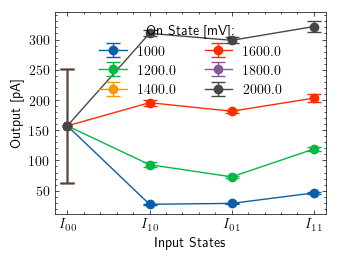

In [79]:
with plt.style.context(['science']):
    
    fig = plt.figure()
    ax  = fig.add_subplot()

    for i in range(len(m1)):

        ax.errorbar([0,1,2,3], [m1[i],m2[i],m3[i],m4[i]], [s1[i],s2[i],s3[i],s4[i]], label=f'${1000*states[i]}$', marker='o', capsize=5)

    ax.legend(title='On State [mV]:',ncol=2)
    ax.set_xlabel('Input States')
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(['$I_{00}$','$I_{10}$','$I_{01}$','$I_{11}$'])
    ax.set_ylabel("Output [pA]")

plt.show()